# Implementation 1

In [6]:
from numbers import Number
import numpy as np


class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"Point(x={self.x}, y={self.y})"

    def __repr__(self):
        return self.__str__()

    def __hash__(self):
        # Hash based on the tuple (x, y)
        return hash((self.x, self.y))

    def __eq__(self, other):
        if not isinstance(other, Point):
            return False
        return self.x == other.x and self.y == other.y

    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        raise IndexError(f'Point index out of range: {index}')

    def __setitem__(self, key, value):
        if key == 0:
            self.x = value
        elif key == 1:
            self.y = value
        raise IndexError(f'Point index out of range: {key}')

    # Python 3.x uses __truediv__ and __floordiv__. __div__ is 2.x-only.

    def __itruediv__(self, other):
        if isinstance(other, Point):
            self.x = self.x / other.x
            self.x = self.y / other.y
            return self
        elif isinstance(other, Number):
            self.x = self.x / other
            self.y = self.y / other
            return self
        else:
            raise ValueError("Unsupported division operation")

    def __truediv__(self, other):
        if isinstance(other, Point):
            return Point(self.x / other.x, self.y / other.y)
        elif isinstance(other, (int, float)):
            return Point(self.x / other, self.y / other)
        raise ValueError("Unsupported division operation")

    def __rtruediv__(self, other):
        return self.__truediv__(other)

    def __ifloordiv__(self, other):
        if isinstance(other, Point):
            self.x = self.x // other.x
            self.y = self.y // other.y
            return self
        elif isinstance(other, Number):
            self.x = self.x // other
            self.y = self.y // other
            return self
        else:
            raise ValueError("Unsupported floor division operation")

    def __floordiv__(self, other):
        if isinstance(other, Point):
            return Point(self.x // other.x, self.y // other.y)
        elif isinstance(other, (int, float)):
            return Point(self.x // other, self.y // other)
        raise ValueError("Unsupported floor division operation")

    def __rfloordiv__(self, other):
        return self.__floordiv__(other)

    def __isub__(self, other):
        if isinstance(other, Point):
            self.x -= other.x
            self.y -= other.y
            return self
        elif isinstance(other, Number):
            self.x -= other
            self.y -= other
            return self
        else:
            raise ValueError('Unsupported subtraction operation')

    def __sub__(self, other):
        if isinstance(other, Point):
            return Point(self.x - other.x, self.y - other.y)
        elif isinstance(other, Number):
            return Point(self.x - other, self.y - other)
        raise ValueError('Unsupported subtraction operation')

    def __rsub__(self, other):
        return self.__sub__(other)

    def __iadd__(self, other):
        if isinstance(other, Point):
            self.x += other.x
            self.y += other.y
            return self
        elif isinstance(other, Number):
            self.x += other
            self.y += other
            return self
        else:
            raise ValueError('Unsupported addition operation')

    def __add__(self, other):
        if isinstance(other, Point):
            return Point(self.x + other.x, self.y + other.y)
        elif isinstance(other, Number):
            return Point(self.x + other, self.y + other)
        raise ValueError('Unsupported addition operation')

    def __radd__(self, other):
        return self.__add__(other)

    def __imul__(self, other):
        if isinstance(other, Point):
            self.x *= other.x
            self.y *= other.y
            return self
        elif isinstance(other, Number):
            self.x *= other
            self.y *= other
            return self
        else:
            raise ValueError('Unsupported multiplication operation')

    def __mul__(self, other):
        if isinstance(other, Point):
            return Point(self.x * other.x, self.y * other.y)
        elif isinstance(other, Number):
            return Point(self.x * other, self.y * other)
        raise ValueError('Unsupported multiplication operation')

    def __rmul__(self, other):
        return self.__mul__(other)

    def __iter__(self):
        return iter([self.x, self.y])

    def distance(self, other):
        if isinstance(other, Point):
            return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
        raise ValueError('Unsupported distance operation')

    def to_dict(self):
        return {'x': self.x, 'y': self.y}

    @classmethod
    def from_dict(cls, dictionary):
        return Point(dictionary['x'], dictionary['y'])

    def to_array(self):
        return [self.x, self.y]

    def copy(self):
        return Point(self.x, self.y)


In [9]:
class Rect:
    """A rectangle defined by its minimum and maximum coordinates."""
    def __init__(self, min_x, min_y, max_x, max_y):
        self.min_x, self.min_y = min_x, min_y
        self.max_x, self.max_y = max_x, max_y

    def intersects(self, other):
        """Check if this rectangle intersects with another."""
        return not (self.max_x < other.min_x or
                    self.min_x > other.max_x or
                    self.max_y < other.min_y or
                    self.min_y > other.max_y)

    def contains(self, other):
        """Check if this rectangle completely contains another."""
        return (self.min_x <= other.min_x and
                self.min_y <= other.min_y and
                self.max_x >= other.max_x and
                self.max_y >= other.max_y)

    def __str__(self):
        return '({:.2f}, {:.2f}, {:.2f}, {:.2f})'.format(self.min_x, self.min_y, self.max_x, self.max_y)

    def __repr__(self):
        return self.__str__()
    
    def draw(self, ax, c='k', lw=1, **kwargs):
        x1, y1 = self.min_x, self.min_y
        x2, y2 = self.max_x, self.max_y
        ax.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1], c=c, lw=lw, **kwargs)


class QuadTree:
    """A Quadtree implementation that works with bounds."""
    def __init__(self, boundary, max_items=4, max_depth=10, depth=0):
        self.boundary = boundary
        self.max_items = max_items
        self.max_depth = max_depth
        self.depth = depth
        self.items = []
        self.children = [None, None, None, None]

    def divide(self):
        """Divide the node into four children."""
        min_x, min_y = self.boundary.min_x, self.boundary.min_y
        max_x, max_y = self.boundary.max_x, self.boundary.max_y
        width = (max_x - min_x) / 2
        height = (max_y - min_y) / 2

        self.children[0] = QuadTree(Rect(min_x, min_y, min_x + width, min_y + height),
                                    self.max_items, self.max_depth, self.depth + 1)
        self.children[1] = QuadTree(Rect(min_x + width, min_y, max_x, min_y + height),
                                    self.max_items, self.max_depth, self.depth + 1)
        self.children[2] = QuadTree(Rect(min_x + width, min_y + height, max_x, max_y),
                                    self.max_items, self.max_depth, self.depth + 1)
        self.children[3] = QuadTree(Rect(min_x, min_y + height, min_x + width, max_y),
                                    self.max_items, self.max_depth, self.depth + 1)

    def insert(self, item):
        """Insert an item into the Quadtree."""
        if not self.boundary.contains(item):
            return False

        if len(self.items) < self.max_items or self.depth == self.max_depth:
            self.items.append(item)
            return True

        if not any(self.children):
            self.divide()

        for child in self.children:
            if child.insert(item):
                return True

        return False

    def query(self, search_boundary, result=[]):
        """Query items within a search boundary."""
        if not self.boundary.intersects(search_boundary):
            return result

        for item in self.items:
            if search_boundary.contains(item):
                result.append(item)

        for child in self.children:
            if child:
                child.query(search_boundary, result)

        return result
    
    def draw(self, ax):
        """Draw a representation of the quadtree on Matplotlib Axes ax."""

        self.boundary.draw(ax)
        if any(self.children):
            self.nw.draw(ax)
            self.ne.draw(ax)
            self.se.draw(ax)
            self.sw.draw(ax)

# Example usage:
boundary = Rect(0, 0, 100, 100)
quadtree = QuadTree(boundary)

# Insert some items
items = [Rect(10, 10, 20, 20), Rect(30, 30, 40, 40), Rect(70, 70, 80, 80)]
for item in items:
    quadtree.insert(item)

# Query items within a search boundary
search_boundary = Rect(0, 0, 50, 50)
result = quadtree.query(search_boundary)
print(result)


[(10.00, 10.00, 20.00, 20.00), (30.00, 30.00, 40.00, 40.00)]


[]

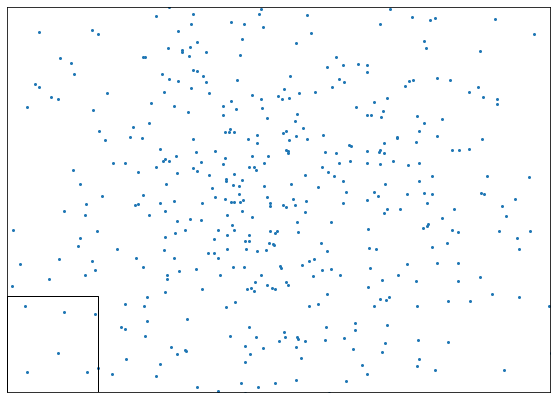

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

DPI = 72
np.random.seed(60)

width, height = 600, 400

N = 500
coords = np.random.randn(N, 2) * height/3 + (width/2, height/2)
points = [Point(*coord) for coord in coords]

fig = plt.figure(figsize=(700/DPI, 500/DPI), dpi=DPI)
ax = plt.subplot()
ax.set_xlim(0, width)
ax.set_ylim(0, height)
quadtree.draw(ax)

ax.scatter([p.x for p in points], [p.y for p in points], s=4)
ax.set_xticks([])
ax.set_yticks([])

# Implementation 2

Objects in search area: [(10, 10, 5, 5), (30, 30, 8, 8)]


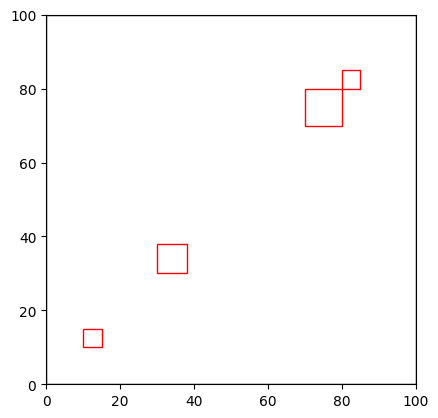

In [1]:
import matplotlib.pyplot as plt

class QuadTreeNode:
    """
    QuadTreeNode represents a node in the quadtree data structure.

    Parameters:
        - bounds: Tuple (x0, y0, x1, y1) representing the bounding box of the node.
        - max_objects: Maximum number of objects a node can hold before splitting.
        - max_levels: Maximum depth (levels) of the quadtree.
        - level: Current level of the node in the quadtree.
    """
    def __init__(self, bounds, max_objects=10, max_levels=5, level=0):
        """
        Initialize the QuadTreeNode.

        Parameters:
            - bounds: Tuple (x0, y0, x1, y1) representing the bounding box of the node.
            - max_objects: Maximum number of objects a node can hold before splitting.
            - max_levels: Maximum depth (levels) of the quadtree.
            - level: Current level of the node in the quadtree.
        """
        self.bounds = bounds
        self.max_objects = max_objects
        self.max_levels = max_levels
        self.level = level
        self.width = self.bounds[2] - self.bounds[0]
        self.height = self.bounds[3] - self.bounds[1]
        self.objects = []
        self.children = [None, None, None, None]

    def split(self):
        """
        Split the node into four sub-nodes.
        """
        sub_width = self.width / 2
        sub_height = self.height / 2
        x0, y0, x1, y1 = self.bounds

        self.children[0] = QuadTreeNode((x0 + sub_width, y0, x1, y0 + sub_height), self.max_objects, self.max_levels, self.level + 1)
        self.children[1] = QuadTreeNode((x0, y0, x0 + sub_width, y0 + sub_height), self.max_objects, self.max_levels, self.level + 1)
        self.children[2] = QuadTreeNode((x0, y0 + sub_height, x0 + sub_width, y1), self.max_objects, self.max_levels, self.level + 1)
        self.children[3] = QuadTreeNode((x0 + sub_width, y0 + sub_height, x1, y1), self.max_objects, self.max_levels, self.level + 1)


    def get_index(self, obj):
        """
        Get the index of the sub-node that the object belongs to.

        Parameters:
            - obj: Tuple (x, y, width, height) representing the object's bounding box.

        Returns:
            - Index of the sub-node (0 to 3) or -1 if the object does not fit in any sub-node.
        """

        index = -1
        vertical_midpoint = self.bounds[0] + (self.height / 2)
        horizontal_midpoint = self.bounds[1] + (self.width / 2)

        top_quadrant = (obj[1] < horizontal_midpoint and obj[1] + obj[3] < horizontal_midpoint)
        bottom_quadrant = (obj[1] > horizontal_midpoint)

        if obj[0] < vertical_midpoint and obj[0] + obj[2] < vertical_midpoint:
            if top_quadrant:
                index = 1
            elif bottom_quadrant:
                index = 2
        elif obj[0] > vertical_midpoint:
            if top_quadrant:
                index = 0
            elif bottom_quadrant:
                index = 3

        return index

    def insert(self, obj):
        if self.children[0] is not None:
            index = self.get_index(obj)

            if index != -1:
                self.children[index].insert(obj)
                return

        self.objects.append(obj)

        if len(self.objects) > self.max_objects and self.level < self.max_levels:
            if self.children[0] is None:
                self._split()

            i = 0
            while i < len(self.objects):
                index = self.get_index(self.objects[i])
                if index != -1:
                    self.children[index].insert(self.objects.pop(i))
                else:
                    i += 1

    def retrieve(self, return_objects, search_area):
        x0, y0, x1, y1 = search_area
        if (
            x0 > self.bounds[2] or
            x1 < self.bounds[0] or
            y0 > self.bounds[3] or
            y1 < self.bounds[1]
        ):
            # No overlap, ignore this quadrant
            return

        for obj in self.objects:
            if (
                x0 <= obj[2] + obj[0] <= x1 and
                y0 <= obj[3] + obj[1] <= y1
            ):
                return_objects.append(obj)

        if self.children[0] is not None:
            for child in self.children:
                child.retrieve(return_objects, search_area)

    def remove_objects_in_bounds(self, remove_bounds):
        new_objects = []
        for obj in self.objects:
            x, y, w, h = obj
            if (
                x + w < remove_bounds[0] or
                x > remove_bounds[2] or
                y + h < remove_bounds[1] or
                y > remove_bounds[3]
            ):
                # Object is outside the remove_bounds, keep it
                new_objects.append(obj)

        self.objects = new_objects

        if self.children[0] is not None:
            for child in self.children:
                child.remove_objects_in_bounds(remove_bounds)

    def remove_object_at_index(self, index):
        if 0 <= index < len(self.objects):
            self.objects.pop(index)

        if self.children[0] is not None:
            for child in self.children:
                child.remove_object_at_index(index)


def plot_quadtree(node, ax):
    if node.children[0] is not None:
        for child in node.children:
            plot_quadtree(child, ax)

    x0, y0, x1, y1 = node.bounds
    rect = plt.Rectangle((x0, y0), x1 - x0, y1 - y0, fill=False, edgecolor='black')
    ax.add_patch(rect)

def plot_objects(objects, ax):
    for obj in objects:
        x, y, w, h = obj
        rect = plt.Rectangle((x, y), w, h, fill=True, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

def main():
    # Example usage
    bounds = (0, 0, 100, 100)
    quadtree = QuadTreeNode(bounds)

    objects = [(10, 10, 5, 5), (30, 30, 8, 8), (70, 70, 10, 10), (80, 80, 5, 5)]

    for obj in objects:
        quadtree.insert(obj)

    search_area = (0, 0, 50, 50)
    return_objects = []
    quadtree.retrieve(return_objects, search_area)

    print("Objects in search area:", return_objects)

    fig, ax = plt.subplots()
    
    # Plot the quadtree structure
    plot_quadtree(quadtree, ax)

    # Plot the objects
    plot_objects(objects, ax)

    # Set limits and show the plot
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

if __name__ == "__main__":
    main()
